In [89]:
from google.colab import files
import zipfile
import os
import pandas as pd
import cv2  # OpenCV para ler imagens
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [24]:
uploaded = files.upload()

labels = pd.read_csv('trainLabels.csv')

Saving trainLabels.csv to trainLabels (1).csv


In [99]:
# 1. Fazer o upload do arquivo .zip
uploaded = files.upload()

# Nome do arquivo zipado (substitua pelo nome correto do seu arquivo zipado)
zip_filename = 'testResized.zip'

# 2. Extrair o conteúdo do arquivo zip
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extrai as imagens na pasta "images"

# Verificar o conteúdo da pasta
print("Arquivos extraídos:", os.listdir("images/testResized"))

# 3. Criar DataFrame com cada imagem como uma linha
image_folder = 'images/testResized'
data = []

# 4. Processar cada imagem e armazenar em um DataFrame
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)

    # Ler a imagem e convertê-la em um array numpy
    image = cv2.imread(image_path)

    # Converter para escala de cinza (opcional)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Descomente se quiser em escala de cinza

    # Redimensionar a imagem (opcional)
    image = cv2.resize(image, (64, 64))  # Descomente para redimensionar todas para 64x64 pixels

    # Normalizar a imagem (opcional)
    # image = image / 255.0  # Descomente para normalizar os pixels entre 0 e 1

    # Adicionar ao DataFrame
    image_info = {
        'file_name': image_name,
        'image_array': np.array(image)  # Armazena a imagem como array numpy
    }
    data.append(image_info)



# 5. Criar o DataFrame
dftest = pd.DataFrame(data)
dftest.head(30)

Arquivos extraídos: ['7927.Bmp', '7527.Bmp', '10009.Bmp', '8936.Bmp', '11068.Bmp', '10711.Bmp', '6521.Bmp', '8744.Bmp', '10725.Bmp', '10734.Bmp', '11472.Bmp', '9843.Bmp', '9189.Bmp', '6759.Bmp', '12288.Bmp', '7786.Bmp', '11830.Bmp', '8691.Bmp', '8069.Bmp', '10484.Bmp', '7513.Bmp', '11842.Bmp', '8434.Bmp', '9412.Bmp', '7863.Bmp', '11778.Bmp', '7689.Bmp', '9461.Bmp', '7199.Bmp', '10409.Bmp', '7859.Bmp', '10261.Bmp', '6905.Bmp', '7353.Bmp', '11368.Bmp', '7722.Bmp', '9333.Bmp', '6887.Bmp', '7888.Bmp', '11264.Bmp', '7086.Bmp', '11893.Bmp', '7004.Bmp', '6451.Bmp', '11746.Bmp', '8859.Bmp', '7278.Bmp', '12210.Bmp', '6912.Bmp', '11725.Bmp', '7204.Bmp', '7069.Bmp', '6295.Bmp', '7942.Bmp', '9178.Bmp', '7049.Bmp', '11529.Bmp', '11848.Bmp', '9918.Bmp', '12000.Bmp', '10889.Bmp', '8449.Bmp', '7838.Bmp', '12123.Bmp', '11919.Bmp', '6346.Bmp', '9882.Bmp', '7276.Bmp', '8210.Bmp', '7428.Bmp', '11031.Bmp', '10952.Bmp', '6880.Bmp', '8188.Bmp', '7523.Bmp', '8071.Bmp', '6797.Bmp', '6298.Bmp', '11555.Bmp', '12

In [18]:
# 1. Fazer o upload do arquivo .zip
uploaded = files.upload()

# Nome do arquivo zipado (substitua pelo nome correto do seu arquivo zipado)
zip_filename = 'trainResized.zip'

# 2. Extrair o conteúdo do arquivo zip
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("images")  # Extrai as imagens na pasta "images"

# Verificar o conteúdo da pasta
print("Arquivos extraídos:", os.listdir("images/testResized"))

# 3. Criar DataFrame com cada imagem como uma linha
image_folder = 'images/trainResized'
data = []

# 4. Processar cada imagem e armazenar em um DataFrame
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)

    # Ler a imagem e convertê-la em um array numpy
    image = cv2.imread(image_path)

    # Converter para escala de cinza (opcional)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Descomente se quiser em escala de cinza

    # Redimensionar a imagem (opcional)
    image = cv2.resize(image, (64, 64))  # Descomente para redimensionar todas para 64x64 pixels

    # Normalizar a imagem (opcional)
    # image = image / 255.0  # Descomente para normalizar os pixels entre 0 e 1

    # Adicionar ao DataFrame
    image_info = {
        'file_name': image_name,
        'image_array': np.array(image)  # Armazena a imagem como array numpy
    }
    data.append(image_info)

# 5. Criar o DataFrame train
dftrain = pd.DataFrame(data)
dftrain.head(30)

Saving trainResized.zip to trainResized.zip
Arquivos extraídos: ['7927.Bmp', '7527.Bmp', '10009.Bmp', '8936.Bmp', '11068.Bmp', '10711.Bmp', '6521.Bmp', '8744.Bmp', '10725.Bmp', '10734.Bmp', '11472.Bmp', '9843.Bmp', '9189.Bmp', '6759.Bmp', '12288.Bmp', '7786.Bmp', '11830.Bmp', '8691.Bmp', '8069.Bmp', '10484.Bmp', '7513.Bmp', '11842.Bmp', '8434.Bmp', '9412.Bmp', '7863.Bmp', '11778.Bmp', '7689.Bmp', '9461.Bmp', '7199.Bmp', '10409.Bmp', '7859.Bmp', '10261.Bmp', '6905.Bmp', '7353.Bmp', '11368.Bmp', '7722.Bmp', '9333.Bmp', '6887.Bmp', '7888.Bmp', '11264.Bmp', '7086.Bmp', '11893.Bmp', '7004.Bmp', '6451.Bmp', '11746.Bmp', '8859.Bmp', '7278.Bmp', '12210.Bmp', '6912.Bmp', '11725.Bmp', '7204.Bmp', '7069.Bmp', '6295.Bmp', '7942.Bmp', '9178.Bmp', '7049.Bmp', '11529.Bmp', '11848.Bmp', '9918.Bmp', '12000.Bmp', '10889.Bmp', '8449.Bmp', '7838.Bmp', '12123.Bmp', '11919.Bmp', '6346.Bmp', '9882.Bmp', '7276.Bmp', '8210.Bmp', '7428.Bmp', '11031.Bmp', '10952.Bmp', '6880.Bmp', '8188.Bmp', '7523.Bmp', '8071.Bm

In [87]:
dftrain['ID'] = (dftrain['file_name'].str.split('.').str[0]).astype(int)
dftrain = dftrain[['ID'] + dftrain.columns[:-1].tolist()]
dftrain

,ID,file_name,image_array
0,1953,1953.Bmp,"[[159, 159, 160, 161, 162, 161, 160, 159, 158,..."
1,5278,5278.Bmp,"[[72, 72, 73, 74, 75, 76, 76, 76, 76, 76, 77, ..."
2,797,797.Bmp,"[[162, 162, 162, 162, 163, 163, 163, 163, 163,..."
3,6216,6216.Bmp,"[[64, 64, 64, 64, 65, 64, 62, 61, 60, 59, 58, ..."
4,4806,4806.Bmp,"[[156, 156, 156, 157, 158, 158, 158, 158, 158,..."
...,...,...,...
6278,688,688.Bmp,"[[34, 34, 34, 33, 33, 33, 32, 32, 32, 31, 30, ..."
6279,3990,3990.Bmp,"[[122, 122, 122, 122, 122, 122, 123, 124, 124,..."
6280,1051,1051.Bmp,"[[205, 205, 203, 202, 200, 200, 200, 200, 201,..."
6281,2079,2079.Bmp,"[[143, 143, 135, 126, 117, 114, 115, 116, 116,..."


In [88]:
train = pd.merge(dftrain,labels,how='left',on='ID')
train

,ID,file_name,image_array,Class
0,1953,1953.Bmp,"[[159, 159, 160, 161, 162, 161, 160, 159, 158,...",u
1,5278,5278.Bmp,"[[72, 72, 73, 74, 75, 76, 76, 76, 76, 76, 77, ...",4
2,797,797.Bmp,"[[162, 162, 162, 162, 163, 163, 163, 163, 163,...",d
3,6216,6216.Bmp,"[[64, 64, 64, 64, 65, 64, 62, 61, 60, 59, 58, ...",7
4,4806,4806.Bmp,"[[156, 156, 156, 157, 158, 158, 158, 158, 158,...",i
...,...,...,...,...
6278,688,688.Bmp,"[[34, 34, 34, 33, 33, 33, 32, 32, 32, 31, 30, ...",T
6279,3990,3990.Bmp,"[[122, 122, 122, 122, 122, 122, 123, 124, 124,...",R
6280,1051,1051.Bmp,"[[205, 205, 203, 202, 200, 200, 200, 200, 201,...",N
6281,2079,2079.Bmp,"[[143, 143, 135, 126, 117, 114, 115, 116, 116,...",T


In [90]:
X = np.array([np.array(img) for img in train['image_array']])

# Normalizar as imagens (opcional)
X = X / 255.0

X[0]

array([[0.62352941, 0.62352941, 0.62745098, ..., 0.61176471, 0.60784314,
        0.60784314],
       [0.62352941, 0.62352941, 0.62745098, ..., 0.61176471, 0.60784314,
        0.60784314],
       [0.62352941, 0.62352941, 0.62745098, ..., 0.61176471, 0.60784314,
        0.60784314],
       ...,
       [0.63137255, 0.63137255, 0.63529412, ..., 0.61568627, 0.61960784,
        0.61960784],
       [0.63137255, 0.63137255, 0.63529412, ..., 0.61568627, 0.61960784,
        0.61960784],
       [0.63137255, 0.63137255, 0.63529412, ..., 0.61568627, 0.61960784,
        0.61960784]])

In [94]:
# Obter as labels e fazer o encoding para valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train['Class'])
y = to_categorical(y)  # One-hot encoding

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se X_train e X_test são imagens de 64x64
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Verificar o formato dos dados
print("Formato de X_train:", X_train.shape)
print("Formato de y_train:", y_train.shape)

Formato de X_train: (5026, 64, 64, 1)
Formato de y_train: (5026, 62)


Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 39s 236ms/step - accuracy: 0.0457 - loss: 4.0459 - val_accuracy: 0.0732 - val_loss: 3.8755
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 33s 208ms/step - accuracy: 0.0611 - loss: 3.8894 - val_accuracy: 0.0732 - val_loss: 3.7886
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 213ms/step - accuracy: 0.0584 - loss: 3.8642 - val_accuracy: 0.0732 - val_loss: 3.7596
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 217ms/step - accuracy: 0.0693 - loss: 3.7673 - val_accuracy: 0.1830 - val_loss: 3.5182
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 33s 207ms/step - accuracy: 0.1573 - loss: 3.4916 - val_accuracy: 0.3119 - val_loss: 2.8520
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step - accuracy: 0.2488 - loss: 3.0012 - val_accuracy: 0.3938 - val_loss: 2.4463
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - accuracy: 0.2946 - loss: 2.7207 - val_accuracy: 0.4885 - val_loss: 2.1864
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.3319 - loss: 2

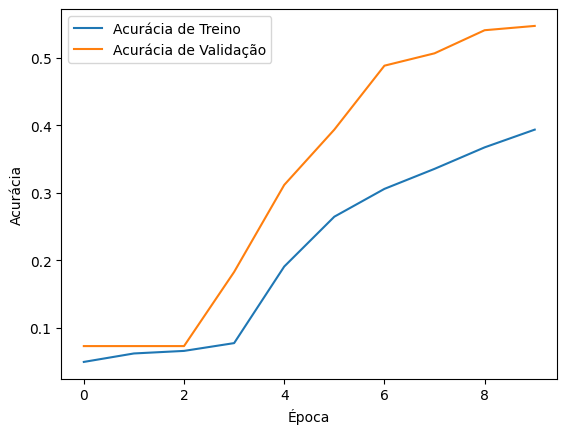

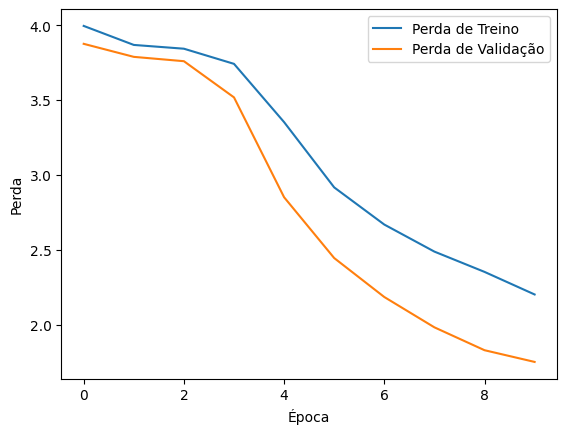

In [96]:
# 2. Construir o modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer com softmax para multi-classes
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Treinar o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 4. Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Acurácia no conjunto de teste:", accuracy)

plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

In [125]:
X_p = np.array([np.array(img) for img in dftest['image_array']])

# Normalizar as imagens (opcional)
X_p = X_p / 255.0

X_p[0]

array([[0.6       , 0.6       , 0.6       , ..., 0.60784314, 0.60784314,
        0.60784314],
       [0.6       , 0.6       , 0.6       , ..., 0.60784314, 0.60784314,
        0.60784314],
       [0.6       , 0.6       , 0.6       , ..., 0.60392157, 0.60784314,
        0.60784314],
       ...,
       [0.58431373, 0.58431373, 0.58039216, ..., 0.59215686, 0.59607843,
        0.59607843],
       [0.58431373, 0.58431373, 0.58431373, ..., 0.59215686, 0.59607843,
        0.59607843],
       [0.58431373, 0.58431373, 0.58431373, ..., 0.59215686, 0.59607843,
        0.59607843]])

In [107]:
model.predict(X_p)

195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step


array([[4.9450830e-07, 4.0233487e-04, 1.0680106e-04, ..., 4.8573008e-03,
        1.0025318e-01, 1.6294391e-03],
       [4.1989438e-02, 1.4756574e-02, 8.4873708e-03, ..., 5.8964419e-04,
        2.5991541e-03, 4.1676555e-03],
       [9.6550575e-03, 1.8135490e-02, 4.1330722e-03, ..., 3.5369600e-04,
        1.3857535e-03, 9.6245459e-04],
       ...,
       [1.4506454e-06, 1.8975403e-06, 3.7463569e-06, ..., 1.1928918e-06,
        7.4748750e-06, 9.9170592e-08],
       [2.6646445e-03, 1.5358683e-02, 1.5795715e-02, ..., 1.4142042e-02,
        3.0559892e-02, 1.9206082e-02],
       [3.8904065e-04, 1.4098805e-02, 3.9389795e-03, ..., 1.3699364e-02,
        4.9136123e-03, 1.3657184e-03]], dtype=float32)

In [114]:
# Se precisar de valores discretos (ex: classes), pode aplicar um argmax (se for classificação)
predicted_classes = np.argmax(model.predict(X_p),-1)

195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step


In [131]:
predicted_classes[5436]

20

In [138]:
predicted_class_name = label_encoder.inverse_transform([predicted_classes[5436]])
print(predicted_class_name)

TypeError: LabelEncoder.inverse_transform() missing 1 required positional argument: 'y'

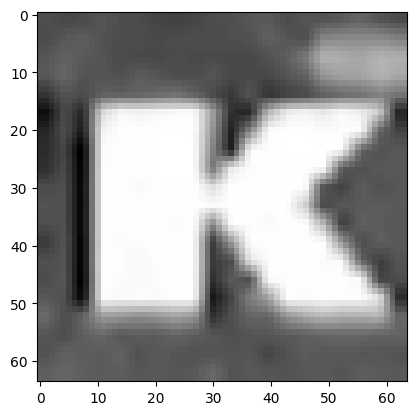

In [133]:
imagem = plt.imshow(X_p[5436],cmap='grey')

In [134]:
uploaded = files.upload()

Saving sampleSubmission.csv to sampleSubmission.csv


In [146]:
classes = label_encoder.inverse_transform(predicted_classes)
classes

array(['Y', 'O', 'r', ..., 'S', 'T', 'R'], dtype=object)

In [147]:
submission = pd.read_csv("sampleSubmission.csv")
submission['Class'] = classes
submission

,ID,Class
0,6284,Y
1,6285,O
2,6286,r
3,6287,C
4,6288,D
...,...,...
6215,12499,C
6216,12500,N
6217,12501,S
6218,12502,T


In [148]:
submission.to_csv('results',index=False)